In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics
#!pip install scikit-learn -U
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
#!pip install --upgrade scikit-learn
#!pip install --upgrade scikit-learn

In [2]:
#Open file
data1 = pd.read_csv('measurements.csv')
display(data1.shape)
data1

(388, 12)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [3]:
#checking NaN values
data1.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [4]:
#opening second file:
data2 = pd.read_excel('measurements2.xlsx')
display(data2.shape)
data2.head()

(388, 12)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [5]:
#checking NaN values:
data2.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
print(data2.describe().T)

               count       mean        std   min    25%   50%   75%    max
distance       388.0  19.652835  22.667837   1.3  11.80  14.6  19.0  216.1
consume        388.0   4.912371   1.033172   3.3   4.30   4.7   5.3   12.2
speed          388.0  41.927835  13.598524  14.0  32.75  40.5  50.0   90.0
temp_inside    376.0  21.929521   1.010455  19.0  21.50  22.0  22.5   25.5
temp_outside   388.0  11.358247   6.991542  -5.0   7.00  10.0  16.0   31.0
AC             388.0   0.077320   0.267443   0.0   0.00   0.0   0.0    1.0
rain           388.0   0.123711   0.329677   0.0   0.00   0.0   0.0    1.0
sun            388.0   0.082474   0.275441   0.0   0.00   0.0   0.0    1.0
refill liters   13.0  37.115385   8.587282  10.0  37.60  38.0  39.0   45.0


In [7]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


In [8]:
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


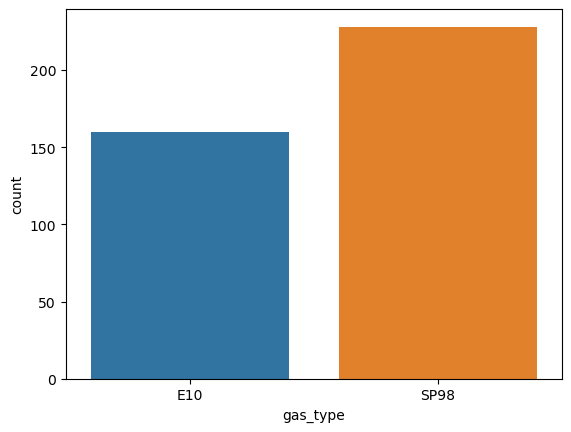

In [9]:
sns.countplot(data = data2, x = "gas_type")
plt.show()

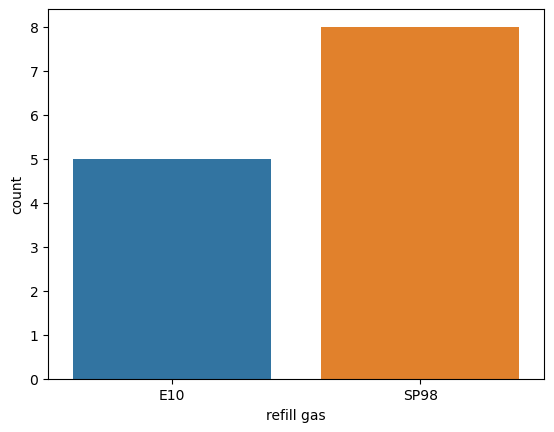

In [10]:
sns.countplot(data = data2, x = "refill gas")
plt.show()

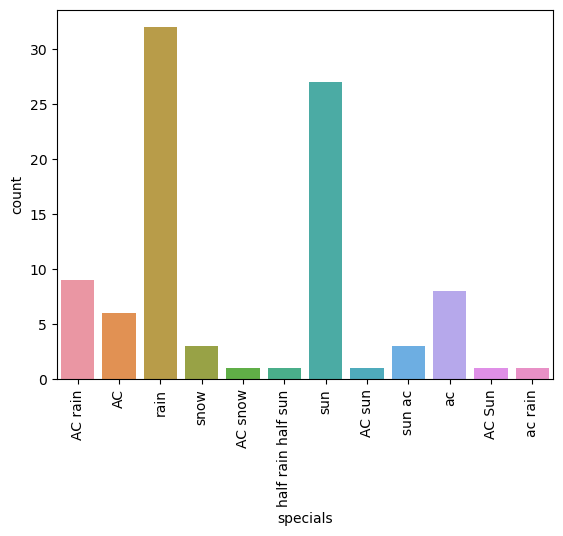

In [11]:
sns.countplot(data = data2, x = "specials")
plt.xticks(rotation=90)
plt.show()

In [12]:
#temp_inside: apply imputer because low number of nulls
#specials: replace nan to other
#refill liters replace nan to 0 because no refill
#refill gas replace nan to notrefill because no refill
impute_it = IterativeImputer()
data2['temp_inside'] = impute_it.fit_transform(data2['temp_inside'].values.reshape(-1,1)).reshape(-1)
data2['specials'] = data2['specials'].fillna('others')
data2['refill liters'] = data2['refill liters'].fillna(0)
data2['refill gas'] = data2['refill gas'].fillna('norefill')

In [13]:
#checking NaN values:
data2.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

<AxesSubplot:>

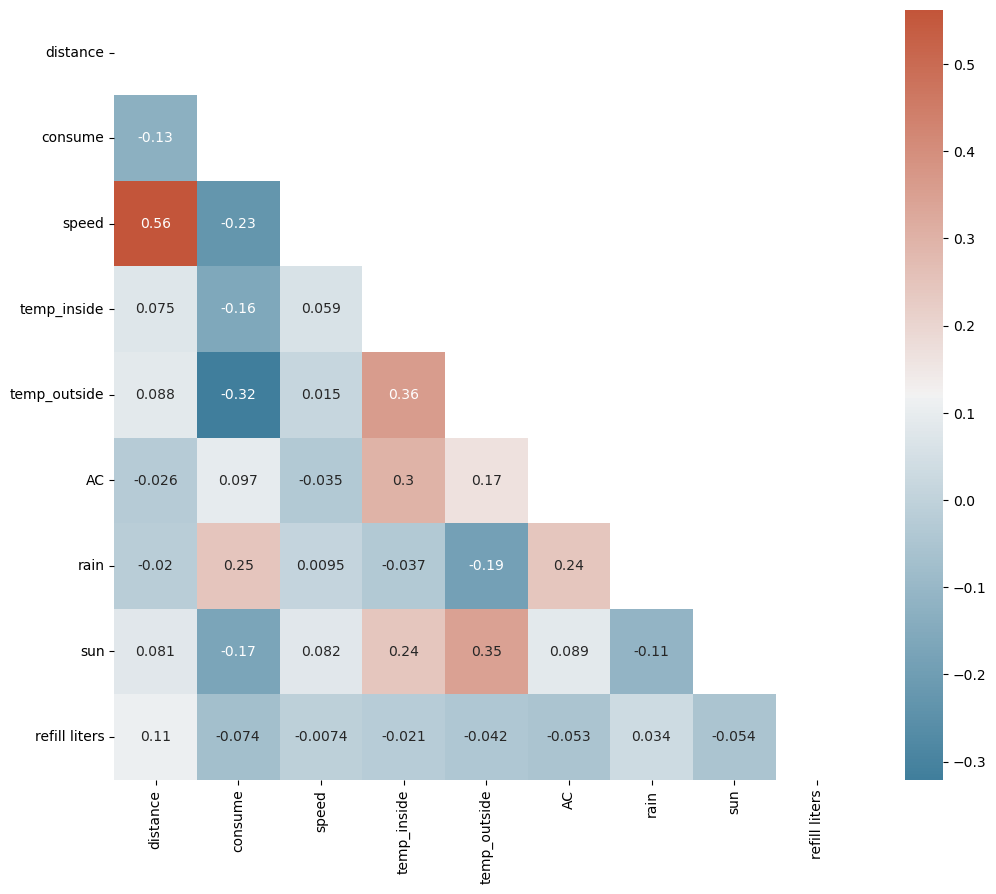

In [14]:
#Correlation & Multi-Collinearity

corr = data2.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [15]:
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.500000,12,others,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.500000,13,others,E10,0,0,0,0.0,norefill
2,11.2,5.5,38,21.500000,15,others,E10,0,0,0,0.0,norefill
3,12.9,3.9,36,21.500000,14,others,E10,0,0,0,0.0,norefill
4,18.5,4.5,46,21.500000,15,others,E10,0,0,0,0.0,norefill
5,8.3,6.4,50,21.500000,10,others,E10,0,0,0,0.0,norefill
6,7.8,4.4,43,21.500000,11,others,E10,0,0,0,0.0,norefill
7,12.3,5.0,40,21.500000,6,others,E10,0,0,0,0.0,norefill
8,4.9,6.4,26,21.500000,4,others,E10,0,0,0,0.0,norefill
9,11.9,5.3,30,21.500000,9,others,E10,0,0,0,0.0,norefill


In [16]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  388 non-null    float64
 11  refill gas     388 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


In [17]:
#Splitting the dataset with our target netMig = number of emigrants or inmigrants
y=data2['gas_type']
X=data2.drop('gas_type', axis=1)

In [18]:
#splitting in train and test data to focus on train features encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(271, 11)

(117, 11)

(271,)

(117,)

In [20]:
y.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [21]:
#splitting in train and test data to focus on train features encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(271, 11)

(117, 11)

(271,)

(117,)

In [23]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [24]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(271, 2)

(271, 9)

(117, 2)

(117, 9)

In [25]:
#OneHot encoding with categorical features
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

,specials_AC Sun,specials_AC rain,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_others,specials_rain,specials_snow,specials_sun,specials_sun ac,refill gas_SP98,refill gas_norefill
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode

,specials_AC rain,specials_AC snow,specials_ac,specials_others,specials_rain,specials_snow,specials_sun,specials_sun ac,refill gas_SP98,refill gas_norefill
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
#Scaling with numerical features

transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)
X_train_num_scale

(271, 9)


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
0,0.051210,0.292135,0.631579,0.384615,0.314286,0.0,0.0,0.0,0.000000
1,0.071695,0.056180,0.394737,0.846154,0.800000,0.0,0.0,1.0,0.000000
2,0.065642,0.089888,0.407895,0.461538,0.828571,0.0,0.0,0.0,0.000000
3,0.468343,0.213483,0.802632,0.461538,0.657143,0.0,0.0,0.0,0.000000
4,0.167132,0.078652,0.407895,0.461538,0.714286,0.0,0.0,1.0,0.000000
5,0.065177,0.370787,0.026316,0.769231,0.914286,1.0,0.0,0.0,0.000000
6,0.072160,0.078652,0.421053,0.384615,0.371429,0.0,0.0,0.0,0.000000
7,0.160615,0.123596,0.486842,0.384615,0.314286,0.0,0.0,0.0,0.000000
8,0.073091,0.067416,0.421053,0.538462,0.542857,0.0,0.0,1.0,0.000000
9,0.068436,0.044944,0.328947,0.846154,0.657143,0.0,0.0,0.0,0.000000


In [28]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(117, 9)


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
0,0.013501,0.258427,0.236842,0.461538,0.657143,0.0,0.0,0.0,0.000000
1,0.060056,0.202247,0.236842,0.384615,0.342857,0.0,0.0,0.0,0.000000
2,0.051210,0.314607,0.342105,0.384615,0.314286,0.0,0.0,0.0,0.000000
3,0.048417,0.146067,0.302632,0.384615,0.314286,0.0,0.0,0.0,0.000000
4,0.079143,0.112360,0.421053,0.461538,0.600000,0.0,0.0,0.0,0.826667
5,0.051210,0.426966,0.500000,0.538462,0.142857,1.0,1.0,0.0,0.000000
6,0.074488,0.191011,0.618421,0.384615,0.314286,1.0,1.0,0.0,0.000000
7,0.145717,0.168539,0.342105,0.384615,0.342857,0.0,0.0,0.0,0.000000
8,0.048883,0.202247,0.157895,0.615385,0.257143,0.0,1.0,0.0,0.000000
9,0.161080,0.157303,0.407895,0.384615,0.485714,0.0,0.0,0.0,0.000000


In [29]:
#Concating numerical and categorical for train and test

X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [30]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test
y_test.reset_index(drop = True, inplace = True)

In [31]:
#making full df for training set for feature selection
data = pd.concat([X_train,y_train],axis = 1)
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC Sun,specials_AC rain,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_others,specials_rain,specials_snow,specials_sun,specials_sun ac,refill gas_SP98,refill gas_norefill,gas_type
0,0.051210,0.292135,0.631579,0.384615,0.314286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,E10
1,0.071695,0.056180,0.394737,0.846154,0.800000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,SP98
2,0.065642,0.089888,0.407895,0.461538,0.828571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,E10
3,0.468343,0.213483,0.802632,0.461538,0.657143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,E10
4,0.167132,0.078652,0.407895,0.461538,0.714286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,SP98
5,0.065177,0.370787,0.026316,0.769231,0.914286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SP98
6,0.072160,0.078652,0.421053,0.384615,0.371429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,E10
7,0.160615,0.123596,0.486842,0.384615,0.314286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,E10
8,0.073091,0.067416,0.421053,0.538462,0.542857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,E10
9,0.068436,0.044944,0.328947,0.846154,0.657143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,SP98


In [34]:
X_test.shape

(117, 19)

In [35]:
X_train.shape

(271, 22)

In [38]:
#using K-Best option to drop some columns with very low variance.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=14).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(271, 22)
(271, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
